A Survey on Technology Choice
======


In [216]:
library(dplyr)
library(tidyr)
library(caret)
library(ggplot2)

In [217]:
# For nicer printing
options(digits=2);

In [218]:
# Read in the data
data <- read.csv("TechSurvey - Survey.csv",header=T);

#convert date to unix second
for (i in c("Start", "End")) 
    data[,i] = as.numeric(as.POSIXct(strptime(data[,i], "%Y-%m-%d %H:%M:%S")))
for (i in 0:12){
    vnam = paste(c("PG",i,"Submit"), collapse="")
    data[,vnam] = as.numeric(as.POSIXct(strptime(data[,vnam], "%Y-%m-%d %H:%M:%S")))
}
#calculate differences in time    
for (i in 12:0){
    pv = paste(c("PG",i-1,"Submit"), collapse="");
    if (i==0) 
        pv="Start";
    vnam = paste(c("PG",i,"Submit"), collapse="");
    data[,vnam] = data[,vnam] -data[,pv];
}

In [219]:
#now explore variables
summary(data);

     Device    Completed       Start               End               PG0Dis   
        :  2   0    :  2   Min.   :1.54e+09   Min.   :1.54e+09   Min.   :  0  
 Bot    :  1   FALSE:546   1st Qu.:1.54e+09   1st Qu.:1.54e+09   1st Qu.:  0  
 PC     :955   TRUE :805   Median :1.54e+09   Median :1.54e+09   Median :  1  
 Phone  :376               Mean   :1.54e+09   Mean   :1.54e+09   Mean   : 44  
 Tablet : 16               3rd Qu.:1.54e+09   3rd Qu.:1.54e+09   3rd Qu.: 24  
 Unknown:  3               Max.   :1.54e+09   Max.   :1.54e+09   Max.   :168  
                           NA's   :2          NA's   :548        NA's   :73   
    PG0Shown      PG0Submit    
 Min.   :   0   Min.   :    2  
 1st Qu.:   0   1st Qu.:    6  
 Median : 102   Median :    9  
 Mean   : 249   Mean   :  299  
 3rd Qu.: 428   3rd Qu.:   15  
 Max.   :1190   Max.   :76226  
 NA's   :73     NA's   :199    
                                       PG1PsnUse  
 For personal work and/or research use      :727  
          

### Interpret  basic summaries

In [220]:
#get numeric fields only for correlation
sel = c()
for (i in 1:dim(data)[2]) if (is.numeric(data[,i])) sel = c(sel, i);


cor(data[,sel],method="spearman",use="pairwise.complete.obs"); #OK for any: uses ranks

,Start,End,PG0Dis,PG0Shown,PG0Submit,PG1Submit,PG2Submit,PG3Submit,PG4Dtr0_6,PG4Psv7_8,...,PG5_12Order,PG5_13Order,PG5Submit,PG6Submit,PG7Submit,PG8Submit,PG9Submit,PG10Submit,PG11Submit,PG12Submit
Start,1.0000,0.9952,-0.0417,-0.11507,0.1350,0.1156,0.0791,0.0384,0.01210,0.00371,...,-0.0369,0.0598,0.08512,0.0054,0.0776,0.0441,0.04101,0.047,7.9e-02,0.0746
End,0.9952,1.0000,-0.0415,-0.09879,0.1142,0.1550,0.0791,0.0511,-0.05185,-0.04576,...,-0.0359,0.0661,0.09088,0.0051,0.0759,0.0435,0.04071,0.052,7.9e-02,0.0772
PG0Dis,-0.0417,-0.0415,1.0000,0.87220,0.0153,0.0065,0.0041,0.0567,0.16368,0.02668,...,0.0151,0.0384,0.00601,0.0277,0.0097,0.0354,0.00995,-0.029,-4.5e-02,0.0546
PG0Shown,-0.1151,-0.0988,0.8722,1.00000,0.0360,0.0205,0.0023,0.0497,0.08226,0.00036,...,0.0074,0.0407,-0.00888,0.0401,0.0121,0.0264,0.00056,-0.045,-7.1e-02,0.0436
PG0Submit,0.1350,0.1142,0.0153,0.03596,1.0000,0.1088,0.1037,0.1273,-0.00802,-0.03763,...,-0.0161,-0.0280,0.17671,0.1518,0.1365,0.1258,0.17579,0.225,1.1e-01,0.1096
PG1Submit,0.1156,0.1550,0.0065,0.02047,0.1088,1.0000,0.1452,0.2688,-0.06852,0.05661,...,0.0512,-0.0651,0.24670,0.2414,0.1133,0.1069,0.10895,0.170,7.4e-02,0.1137
PG2Submit,0.0791,0.0791,0.0041,0.00235,0.1037,0.1452,1.0000,0.2045,0.00146,0.00897,...,0.0210,-0.0047,0.21851,0.2696,0.1245,0.1567,0.20127,0.099,1.1e-01,0.1073
PG3Submit,0.0384,0.0511,0.0567,0.04968,0.1273,0.2688,0.2045,1.0000,0.00865,0.04424,...,0.0464,-0.0222,0.26048,0.2706,0.1316,0.1822,0.27450,0.161,1.4e-01,0.1642
PG4Dtr0_6,0.0121,-0.0518,0.1637,0.08226,-0.0080,-0.0685,0.0015,0.0087,1.00000,NA,...,0.1774,-0.1289,-0.05214,-0.1618,0.1560,0.0695,-0.07292,0.044,8.4e-04,-0.0272
PG4Psv7_8,0.0037,-0.0458,0.0267,0.00036,-0.0376,0.0566,0.0090,0.0442,NA,1.00000,...,-0.0008,-0.0218,0.08974,-0.0146,-0.0363,0.0526,0.05977,0.069,-4.9e-02,-0.0217


Interpret correlations: onlys start vs End, calculate differene instead


### Simple questions

- Time to take entire survey?
- Question that took the longest to complete?
- Question that took the least time?
- Top-ranked criteria?
- Demographic distribution by age?

In [221]:
#finding how many surveys are completed
data_complete = filter(data, Completed == TRUE)
print(paste0("# of surveys opened: " , nrow(data)))
print(paste0("# of suerveys completed: " , nrow(data_complete)))

[1] "# of surveys opened: 1353"
[1] "# of suerveys completed: 805"


In [222]:
#calculating time to take the survey
survey_time = data_complete$End - data_complete$Start
print(paste0("Max Survey Time: ", max(survey_time), ' seconds'))
print(paste0("Min Survey Time: ", min(survey_time), ' seconds'))
print(paste0("Average Survey Time: ", round(mean(survey_time)), ' seconds'))
print(paste0("Median Survey Time: ", median(survey_time), ' seconds'))

[1] "Max Survey Time: 87551 seconds"
[1] "Min Survey Time: 51 seconds"
[1] "Average Survey Time: 680 seconds"
[1] "Median Survey Time: 225 seconds"


In [223]:
# get the submission times and remove PG0Submit becuase its for the whole survey and NAs
submission_time = select(data_complete, contains('Submit'), -starts_with('PG0')) %>%
    na.omit()

print(summary(submission_time))
#find the average time to complete each of the quesitons
averagetime = colMeans(submission_time)
print('----------------------------------------------------------------------')
print("Average Time to complete each question:")
print(averagetime)
print(paste0("Question with maximum time took: ", max(averagetime), ' seconds'))
print(paste0("Question with minimum time took : ", min(averagetime), ' seconds'))

   PG1Submit      PG2Submit      PG3Submit      PG4Submit     PG5Submit   
 Min.   :   1   Min.   :   1   Min.   :   1   Min.   :  1   Min.   :   3  
 1st Qu.:  11   1st Qu.:   9   1st Qu.:  16   1st Qu.:  6   1st Qu.:  45  
 Median :  16   Median :  13   Median :  24   Median :  7   Median :  62  
 Mean   :  42   Mean   :  31   Mean   :  42   Mean   :  9   Mean   :  85  
 3rd Qu.:  31   3rd Qu.:  31   3rd Qu.:  41   3rd Qu.:  9   3rd Qu.:  84  
 Max.   :6892   Max.   :1470   Max.   :4648   Max.   :332   Max.   :4130  
   PG6Submit      PG7Submit     PG8Submit     PG9Submit       PG10Submit  
 Min.   :   1   Min.   :  1   Min.   :  1   Min.   :    0   Min.   :   1  
 1st Qu.:   7   1st Qu.:  6   1st Qu.:  5   1st Qu.:    7   1st Qu.:   5  
 Median :   9   Median :  8   Median :  8   Median :   10   Median :   7  
 Mean   :  25   Mean   : 11   Mean   : 12   Mean   :   40   Mean   :  17  
 3rd Qu.:  12   3rd Qu.: 11   3rd Qu.: 14   3rd Qu.:   14   3rd Qu.:  10  
 Max.   :5759   Max.   :7

In [224]:
#show results of question 5
q5_answers = select(data_complete, starts_with('PG5'), -ends_with('Time'), -ends_with('Order'), -ends_with('Submit')) 
print(summary(q5_answers))

           PG5_1RRPQ             PG5_2BNUI              PG5_3HDS  
                :335                  :381                  :225  
 Essential      : 59   Essential      :  3   Essential      :103  
 High Priority  :102   High Priority  : 25   High Priority  :199  
 Low Priority   : 85   Low Priority   :120   Low Priority   : 68  
 Medium Priority:130   Medium Priority: 91   Medium Priority:161  
 Not a Priority : 94   Not a Priority :185   Not a Priority : 49  
            PG5_4VGP              PG5_5PHR             PG5_6SSYOP 
                :311                  :213                  :310  
 Essential      : 22   Essential      : 79   Essential      : 61  
 High Priority  :109   High Priority  :247   High Priority  :136  
 Low Priority   : 87   Low Priority   : 63   Low Priority   : 83  
 Medium Priority:162   Medium Priority:160   Medium Priority:109  
 Not a Priority :114   Not a Priority : 43   Not a Priority :106  
           PG5_7NDYP              PG5_8CP               PG5_9F

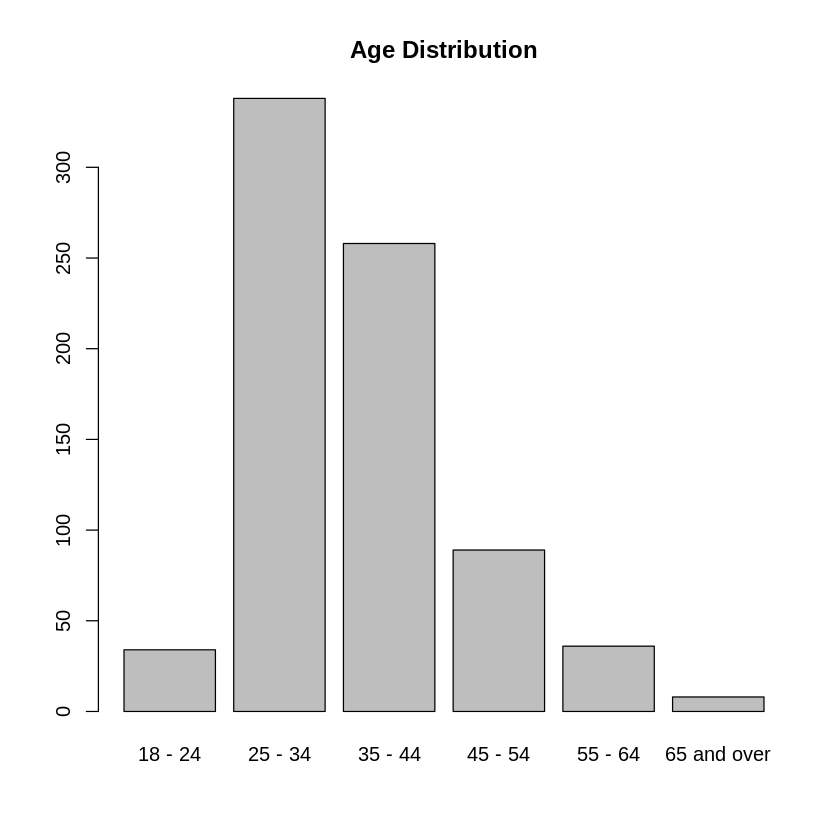

In [225]:
age = select(data_complete, PG12Resp) %>%
    filter(PG12Resp != '')

age1 = factor(age[,])

barplot(table(age1), main = 'Age Distribution')

In [250]:
for(i in colnames(data))
{
    data[,i] <- as.numeric (data[,i]);
}

data <- replace(data, is.na(data), 0)
sel = c() 
for (i in 1:dim(data)[2]) if (is.numeric(data[,i])) sel = c(sel, i);
cor(data[,sel], data[,'PG5_6SSYOP'], method="spearman",use="pairwise.complete.obs"); #OK for any: uses ranks



Device,-0.0784
Completed,0.5948
Start,-0.0221
End,0.5215
PG0Dis,0.0064
PG0Shown,0.0128
PG0Submit,0.2412
PG1PsnUse,0.2105
PG1WdAuth,0.1162
PG1Trn,0.0991
PG1Other,0.0692


In [295]:
datas = select(data, -matches('Device'), -matches('Start'), -matches('End'), -contains("Time"), -contains("Submit"),
              -contains('PG0'),  -matches("PG4AllResp"), -contains("PG4"), -matches("PG5_1RRPQ"), -matches("PG5_2BNUI"),
              -matches("PG5_3HDS"), -matches("PG5_4VGP"), -matches("PG5_5PHR"), -matches("PG5_7NDYP"), 
              -matches("PG5_8CP"), -matches("PG5_9FRP"), -matches("PG5_10RPA"), -matches("PG5_11NSG"), -matches("PG5_12NWG"),
              -matches("PG5_13NFG"))


#datas = select(data, -contains("Time"), -matches('Start'), -matches('End'), -matches("Device"))

for(i in colnames(datas))
{
    datas[,i] <- as.numeric (datas[,i]);
}

datas <- replace(datas, is.na(datas), 0)
sel = c() 
for (i in 1:dim(datas)[2]) if (is.numeric(datas[,i])) sel = c(sel, i);
cor(datas[,sel], datas[,'PG5_6SSYOP'], method="spearman",use="pairwise.complete.obs"); #OK for any: uses ranks


Completed,0.595
PG1PsnUse,0.211
PG1WdAuth,0.116
PG1Trn,0.099
PG1Other,0.069
PG2Resp,0.382
PG2Resp.1,0.446
PG5_1Order,0.783
PG5_2Order,0.784
PG5_3Order,0.716
PG5_4Order,0.777


In [296]:
model <- lm(PG5_6SSYOP ~ ., data = datas)
summary(model)


Call:
lm(formula = PG5_6SSYOP ~ ., data = datas)

Residuals:
   Min     1Q Median     3Q    Max 
-3.330 -0.467 -0.006  0.067  4.457 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.539334   0.847100   -0.64   0.5244    
Completed      0.185077   0.210038    0.88   0.3784    
PG1PsnUse     -0.036114   0.024316   -1.49   0.1377    
PG1WdAuth     -0.050800   0.039001   -1.30   0.1930    
PG1Trn         0.092747   0.086791    1.07   0.2854    
PG1Other      -0.000166   0.003741   -0.04   0.9646    
PG2Resp        0.054523   0.032561    1.67   0.0943 .  
PG2Resp.1     -0.000116   0.000672   -0.17   0.8628    
PG5_1Order     0.027674   0.011198    2.47   0.0136 *  
PG5_2Order     0.008058   0.011297    0.71   0.4758    
PG5_3Order     0.020104   0.010507    1.91   0.0559 .  
PG5_4Order     0.023342   0.011230    2.08   0.0379 *  
PG5_5Order     0.016167   0.010866    1.49   0.1370    
PG5_6Order     0.145677   0.010657   13.67  < 2e-16 ***
PG5_7Order 

# Answers to the simple Quesiontions:
### - Time to take entire survey?
Maximum Time is: 87551 seconds with Average of 680 seconds
### - Question that took the longest to complete?
Based on the average completeion time: Q5 took the longest with 85.24 seconds
### - Question that took the least time?
Based on the average completeion time: Q11 took the least with 6.37 seconds
### - Top-ranked criteria?
Computing Performance was the most important criteria based on the number of essential choices (228)
### - Demographic distribution by age?
Most of the people who took the survey are between 25 and 44 years old

# Analysis
## Hypothesis
I think the priority is going to be affected by the type of the programming language used, becuase the choice of the programming language can be a sign of how big the project is (most likely big software projects will use C/C++ or Java rather than Python or R)
## Calculated measuers
I have used the correlation function to find correlation between my target respone variable and all the other variables
## Decriptive analysis of proposed measures
I have used the correlation values to eleminate some of the variables with very low correlations beacuse I thought that they won't be very important to the reult of the model
## Transfomration and cleaning
The variables I chose to drop were the Device because I think it won't affect the responses. <br>
I have also eleminted all the other response variables for Q5 since it was said in the writeup that we can't use them for modeling.<br>
I also removed All responses for Q4 beacasue I don't think recommedation of a package to othres would affect the priority.<br>
I also eleminated the Start and End, Time and Submit becuse they are just time values and I think times shouldn't have an effect on the result.
## Statement about correlation
Most of the values I eleminted have low correaltion values (like the Device), I have kept some of the low correlations of the programming languages variables because I wanted to see how they come into play. I also kept some of the highly correaltion measures. So my collection of the chosen measuers was combination of low, high and medium correlation.
## Choosing the model for fitting the data
I have chosen to use a linear regression model to fit the data, given that it is the easiest and simplest to understand although it might not be the best.
## Analysis of the results
As the results of the model indicate, it was not very good model for this data, the data were skewed to the left and were not symmetrical, I had an R^2 value of 0.667 which indicates that model didn't fit the data very well.
However, based on the coefficemts of the results as I expected, the programming langueage C had a very high value and relationship with the scale/Size of the project.
A better model that can be chosen might be a knn it would give us better results in trying to fit the data in a collection rather than fitting it across a line. After I saw the results, I beleive that it would be a lot better.
## Recommendation of how to improve the survey
The survey contained a lot of text responses, text responses make it hard for a computer program to do analysis.
The "other" part of some of the questions makes it even harder as more people take the survey, the more this collection of answers would grow.
A limited collection of answers and choices would make it easier to interpret and model the data.